# EASC 305: Spatial Analysis
## 

In [1]:
%matplotlib notebook 

import scipy
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font',   size=SMALL_SIZE)        # controls default text sizes
plt.rc('axes',   titlesize=SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes',   labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick',  labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Demo 1: Contouring 

In [2]:
# Read the data in and make them column vectors
E = np.loadtxt('NOTREDAM.TXT',skiprows=1)[:,0].reshape(-1,1) 
N = np.loadtxt('NOTREDAM.TXT',skiprows=1)[:,1].reshape(-1,1)
z = np.loadtxt('NOTREDAM.TXT',skiprows=1)[:,2].reshape(-1,1)

<IPython.core.display.Javascript object>


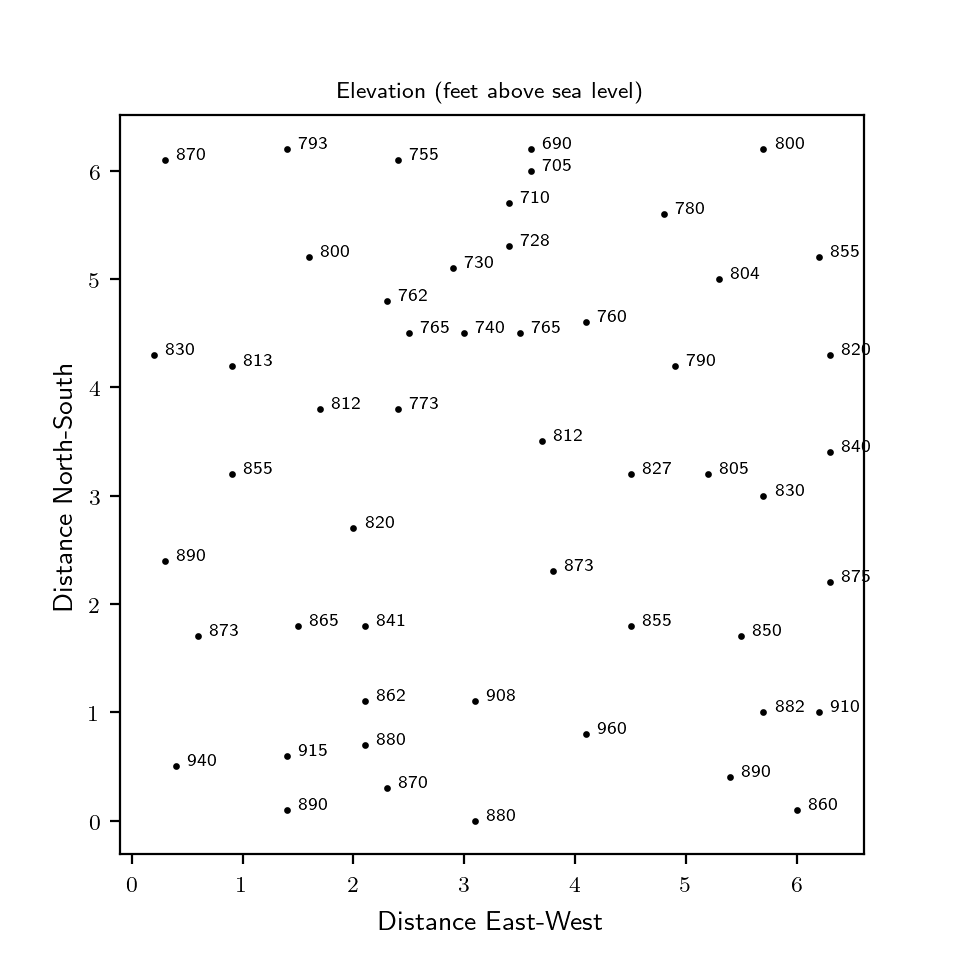

Text(0.5, 1.0, 'Elevation (feet above sea level)')

In [3]:
fig, ax = plt.subplots(figsize=(4.8,4.8))

ax.scatter(E,N,c='k',s=2.)

# annoate the scatter at each ppiint
for i, txt in enumerate(z):
    ax.annotate(int(txt), (E[i]+.1, N[i]),fontsize='small')
    
ax.set_xlabel('Distance East-West')
ax.set_ylabel('Distance North-South')
ax.set_title('Elevation (feet above sea level)')

In [4]:
from scipy.interpolate import griddata

Egrid = np.linspace(E.min(),E.max(),50)                     # define regular grid in x
Ngrid = np.linspace(N.min(),N.max(),50)                     # define regular grid in y
X, Y  = np.meshgrid(Egrid,Ngrid)                            # Construct 2D grid of x,y
Z     = griddata(np.hstack((E,N)),z,(X, Y),method='cubic')  # Cubic interpolation

<IPython.core.display.Javascript object>


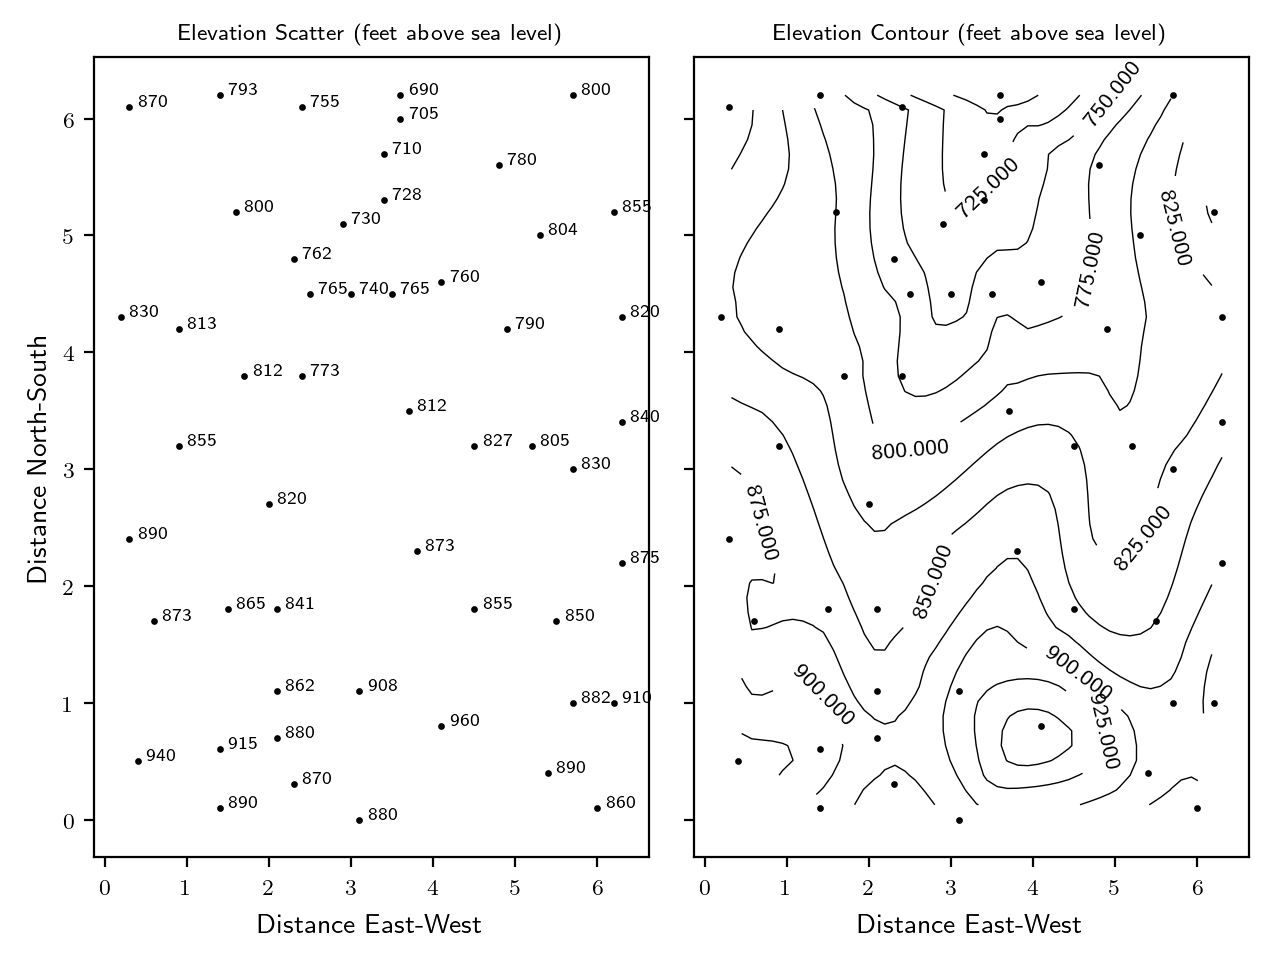

In [5]:
fig, ax = plt.subplots(1,2,sharex=True,sharey=True)

ax[0].scatter(E,N,c='k',s=2.)

# annoate the scatter at each ppiint
for i, txt in enumerate(z):
    ax[0].annotate(int(txt), (E[i]+.1, N[i]),fontsize='small')
    
ax[0].set_xlabel('Distance East-West')
ax[0].set_ylabel('Distance North-South')
ax[0].set_title('Elevation Scatter (feet above sea level)')


ax[1].scatter(E,N,c='k',s=2.)
# plot contoured result with 10 contour lines (i.e. levels)
CS = ax[1].contour(X,Y,Z[:,:,0],levels=10,colors='k',linewidths=0.5)
# label contour inline
ax[1].clabel(CS, inline=1)
ax[1].set_xlabel('Distance East-West')
ax[1].set_title('Elevation Contour (feet above sea level)')

fig.tight_layout()

# Demo 2: 1D interpolation

Using Paleo oceanographic core data: Age (kyr BP), foram 18dO

In [6]:
#Paleo oceanographic core data: Age (kyr BP), foram 18dO

series1 = np.loadtxt('series1.txt')
series2 = np.loadtxt('series2.txt')

t1      = series1[:,0]              # time vector, series 1
t2      = series2[:,0]              # time vector, series 2
  
d18O1   = series1[:,1]              # data vector, series 1
d18O2   = series2[:,1]              # data vector, series 2

intv1   = np.diff(t1)               # extract dt between samples
intv2   = np.diff(t2)               # extract dt between samples

<IPython.core.display.Javascript object>


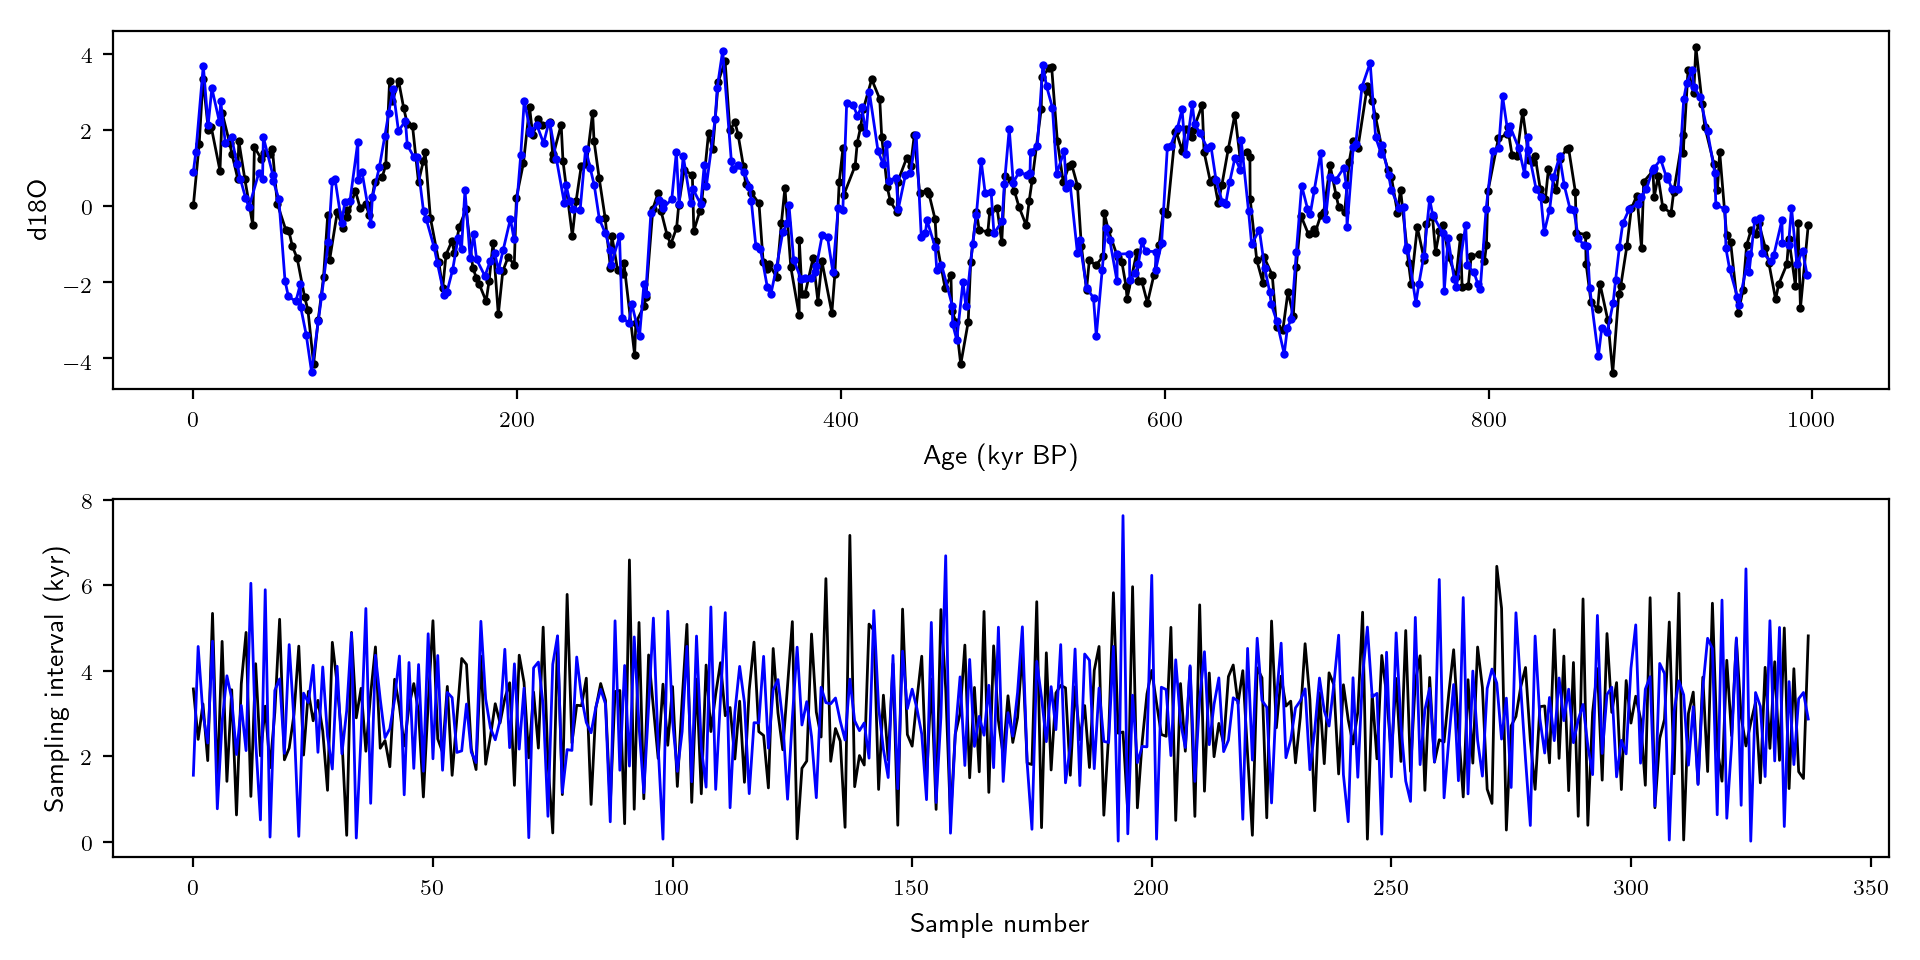

In [7]:
fig, ax = plt.subplots(2,1,figsize=(9.6,4.8))

ax[0].plot(t1,d18O1,'k-o',lw=1,markersize=2)
ax[0].plot(t2,d18O2,'b-o',lw=1,markersize=2)
ax[0].set_xlabel('Age (kyr BP)')
ax[0].set_ylabel('d18O')

ax[1].plot(intv1,'k-',lw=1)
ax[1].plot(intv2,'b-',lw=1)
ax[1].set_xlabel('Sample number')
ax[1].set_ylabel('Sampling interval (kyr)')

fig.tight_layout()

In [8]:
print('Sample 1:')
print('mean dt: {:.3f}, min t: {:.3f}, max t: {:.3f}\n'.format(intv1.mean(),t1.min(),t1.max()))

print('Sample 2:')
print('mean dt: {:.3f}, min t: {:.3f}, max t: {:.3f}\n'.format(intv2.mean(),t2.min(),t2.max()))

Sample 1:
mean dt: 2.951, min t: 0.000, max t: 997.465

Sample 2:
mean dt: 2.949, min t: 0.000, max t: 996.823



In [9]:
# Define new time axis
dt = 3                         # sampling interval
df = 1/dt                      # sampling frequency
t  = np.arange(0,996,dt)       # new time vector

In [10]:
from scipy import interpolate

# Interpolate data onto new time axis (LINEAR). interpolate.interp1d will return
# a function that takes a new x-axis to interpolate the data onto. We return the 
# interpolated data in one line by directly calling the function 
d18O1_linear = interpolate.interp1d(t1,d18O1,kind='linear')(t)
d18O2_linear = interpolate.interp1d(t2,d18O2,kind='linear')(t)

# Find the B-spline representation of 1-D curve with cubic spline. Will return a tuple t, c, k where 
# t is vector of knots, c is the B-spline coefficients, and k is tthe degree of the spline
tck1 = interpolate.splrep(t1,d18O1) 
tck2 = interpolate.splrep(t2,d18O2)

# Interpolate data onto new time axis with the Cubic Spline coefs and knots
d18O1_spline = interpolate.splev(t, tck1, der=0)
d18O2_spline = interpolate.splev(t, tck2, der=0)

<IPython.core.display.Javascript object>


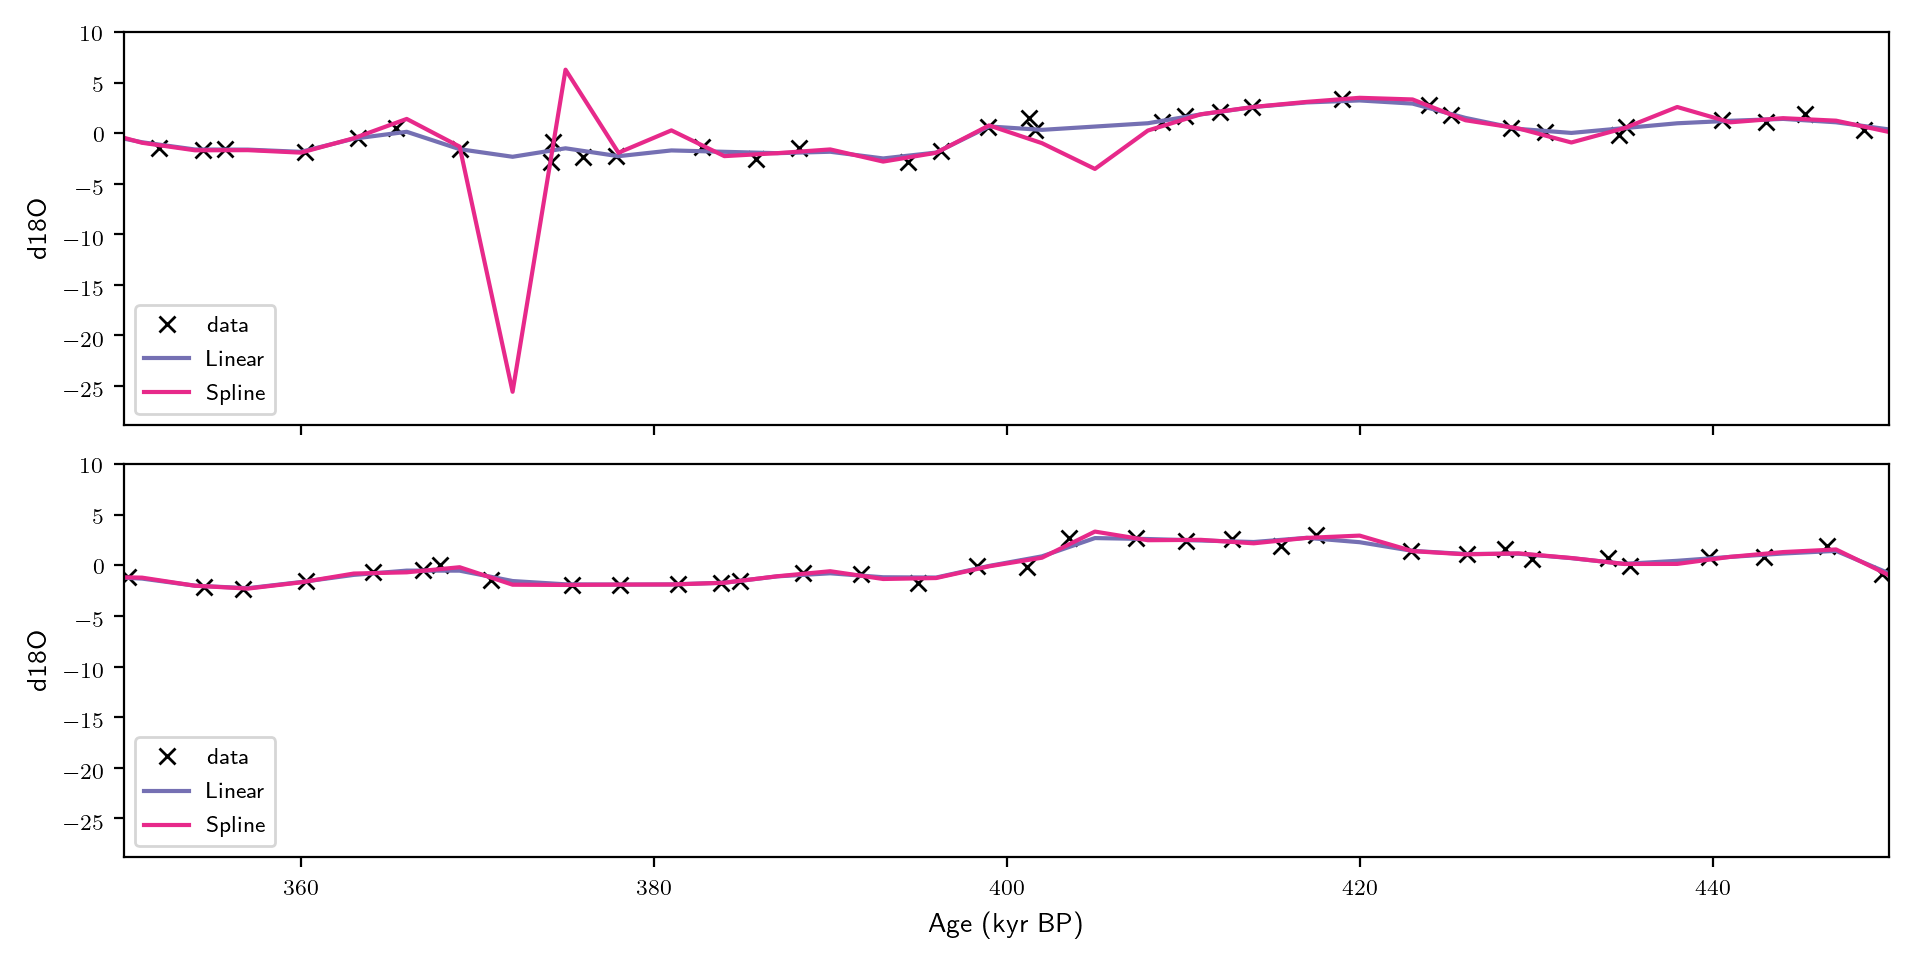

In [11]:
fig, ax = plt.subplots(2,1,figsize=(9.6,4.8),sharex=True,sharey=True)

ax[0].plot(t1,d18O1,'kx',label='data')
ax[0].plot(t,d18O1_linear,c='#7570b3',label='Linear')
ax[0].plot(t,d18O1_spline,c='#e7298a',label='Spline')
ax[0].set_ylabel('d18O')
ax[0].legend()

ax[1].plot(t2,d18O2,'kx',label='data')
ax[1].plot(t,d18O2_linear,c='#7570b3',label='Linear')
ax[1].plot(t,d18O2_spline,c='#e7298a',label='Spline')
ax[1].set_xlabel('Age (kyr BP)')
ax[1].set_ylabel('d18O')
ax[1].legend()

ax[1].set_xlim(350,450)
ax[1].set_ylim(None,10)

fig.tight_layout()

In [12]:
import scipy.signal as signal

In [13]:
# Compute amplitude spectra (only possible with regularly sampled data)
f, pxx1_L = signal.periodogram(d18O1_linear,fs=df,nfft=256)
f, pxx1_S = signal.periodogram(d18O1_spline,fs=df,nfft=256)
f, pxx2_L = signal.periodogram(d18O2_linear,fs=df,nfft=256)
f, pxx2_S = signal.periodogram(d18O2_spline,fs=df,nfft=256)


amp1_L    = np.real(pxx1_L)
amp1_S    = np.real(pxx1_S)
amp2_L    = np.real(pxx2_L)
amp2_S    = np.real(pxx2_S)

<IPython.core.display.Javascript object>


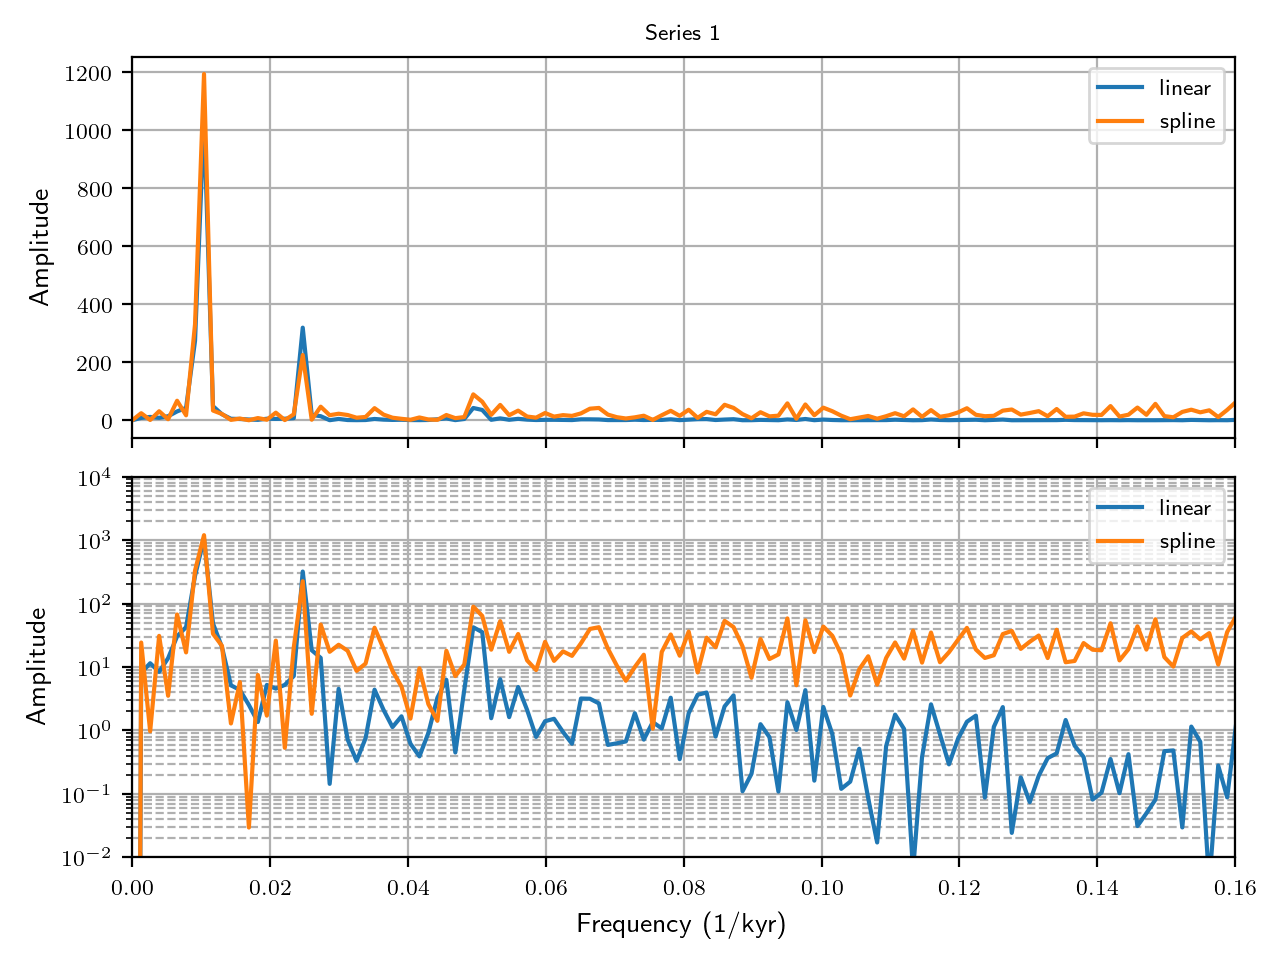

In [14]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(f,pxx1_L,label='linear')
ax[0].plot(f,pxx1_S,label='spline')
ax[0].legend()
ax[0].set_xlim(0, 0.16)
ax[0].grid(True)
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Series 1')

ax[1].semilogy(f,pxx1_L,label='linear')
ax[1].semilogy(f,pxx1_S,label='spline')
ax[1].set_ylim(1e-2, 1e4)
ax[1].legend()
ax[1].grid(True)
ax[1].grid(which='minor', linestyle='--')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Frequency (1/kyr)')

fig.tight_layout()

<IPython.core.display.Javascript object>


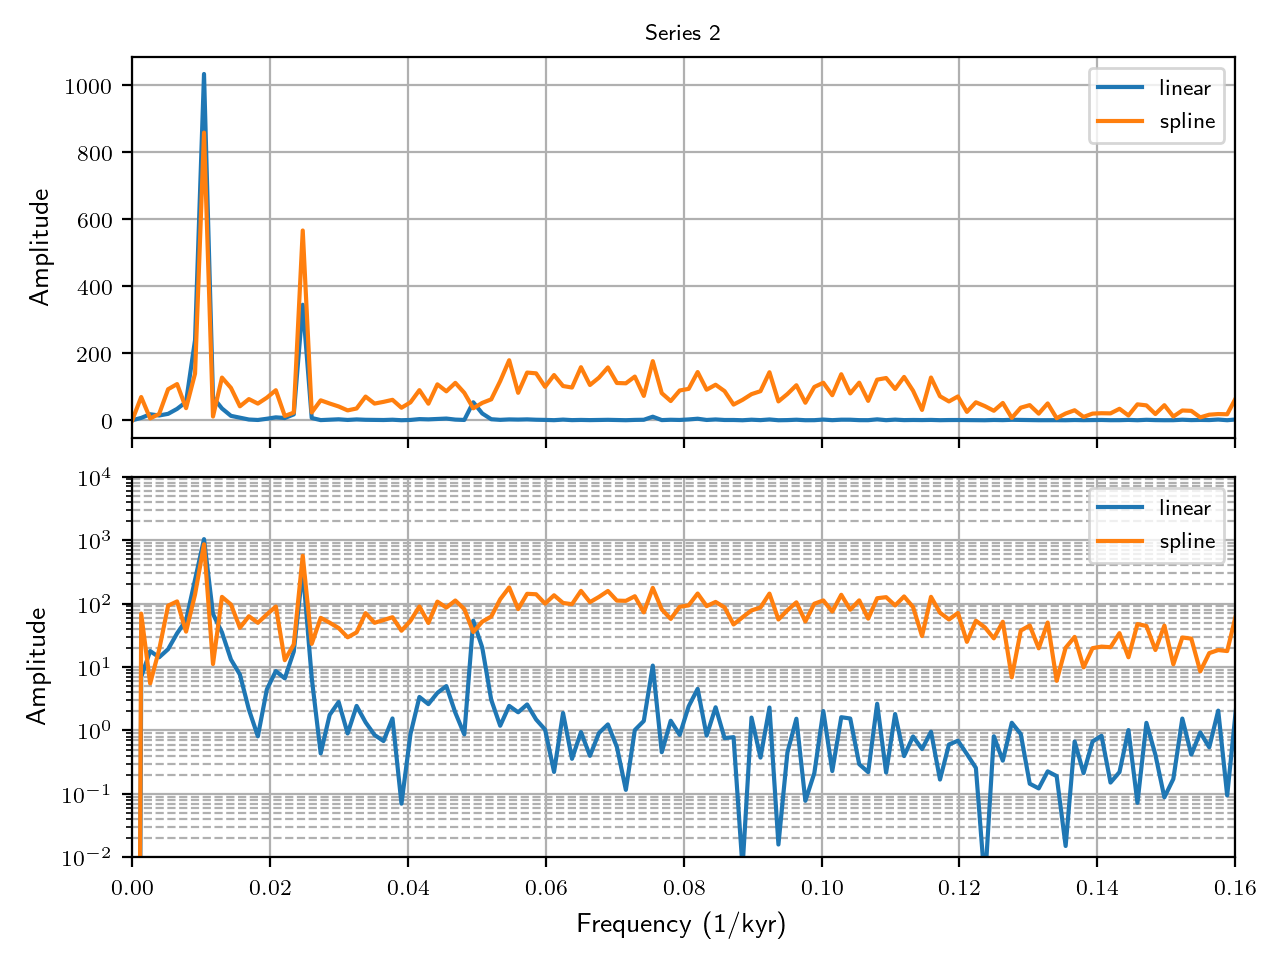

In [15]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(f,pxx2_L,label='linear')
ax[0].plot(f,pxx2_S,label='spline')
ax[0].legend()
ax[0].set_xlim(0, 0.16)
ax[0].grid(True)
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Series 2')

ax[1].semilogy(f,pxx2_L,label='linear')
ax[1].semilogy(f,pxx2_S,label='spline')
ax[1].set_ylim(1e-2, 1e4)
ax[1].legend()
ax[1].grid(True)
ax[1].grid(which='minor', linestyle='--')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Frequency (1/kyr)')

fig.tight_layout()

# Demo 3: 2D interpolation

In [16]:
# Read the data in and make them column vectors
x = np.loadtxt('normalfault.txt')[:,0].reshape(-1,1) 
y = np.loadtxt('normalfault.txt')[:,1].reshape(-1,1)
z = np.loadtxt('normalfault.txt')[:,2].reshape(-1,1)

<IPython.core.display.Javascript object>


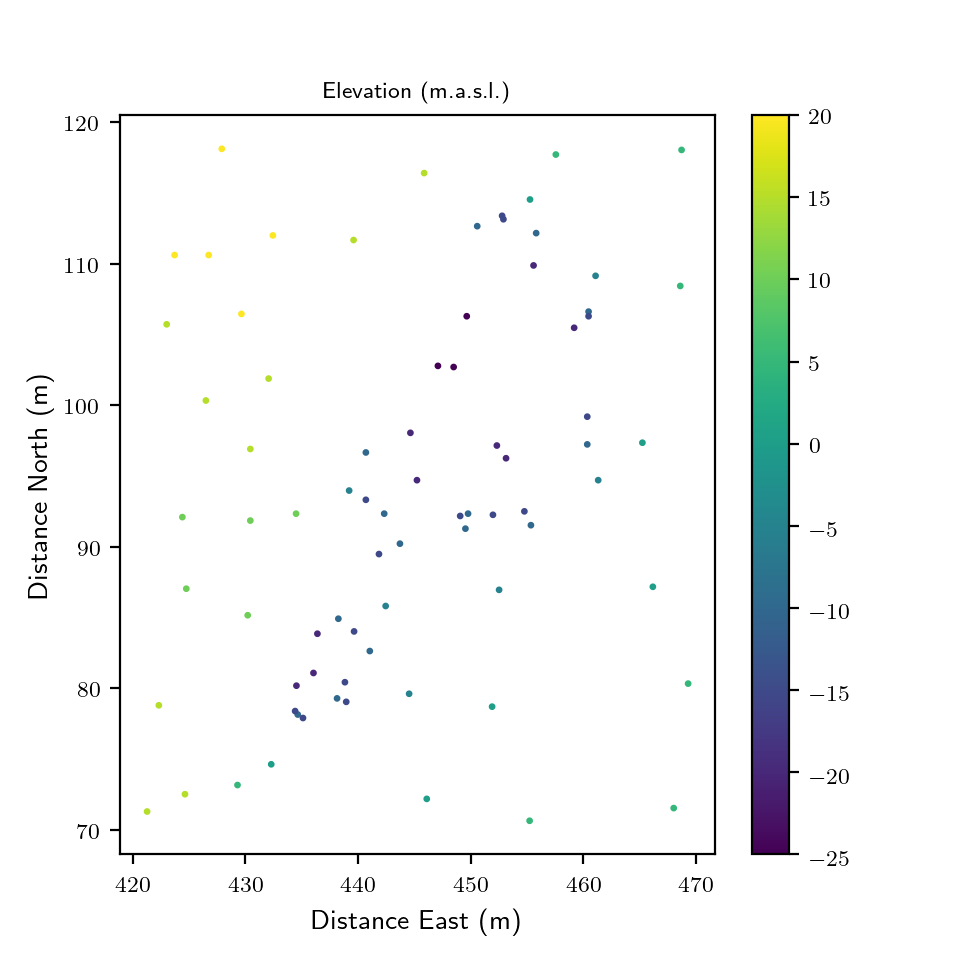

Text(0.5, 1.0, 'Elevation (m.a.s.l.)')

In [17]:
fig, ax = plt.subplots(figsize=(4.8,4.8))

scat = ax.scatter(x,y,c=z,s=2.)
fig.colorbar(scat,ax=ax)    

ax.set_xlabel('Distance East (m)')
ax.set_ylabel('Distance North (m)')
ax.set_title('Elevation (m.a.s.l.)')

Lets test different interpolation schemes:  

In [18]:
from scipy.interpolate import griddata

xgrid = np.linspace(x.min(),x.max(),50)     # define regular grid in x
ygrid = np.linspace(y.min(),y.max(),50)     # define regular grid in y
X, Y  = np.meshgrid(xgrid,ygrid)            # Construct 2D grid of x,y

ZN = griddata(np.hstack((x,y)),z,(X, Y),method='nearest')  # Nearest neighbour interpolation
ZL = griddata(np.hstack((x,y)),z,(X, Y),method='linear')   # Linear interpolation  
ZC = griddata(np.hstack((x,y)),z,(X, Y),method='cubic')    # Cubic interpolation 

In [19]:
# Spline is special and needs to be called from a different function
tck = interpolate.bisplrep(x, y, z)
ZS  = interpolate.bisplev(X[0,:], Y[:,0], tck).T

/Users/andrewnolan/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: nxest or nyest too small or s is too small. (fp>s)
	kx,ky=3,3 nx,ny=9,9 m=78 fp=1009.886687 s=65.510004
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<IPython.core.display.Javascript object>


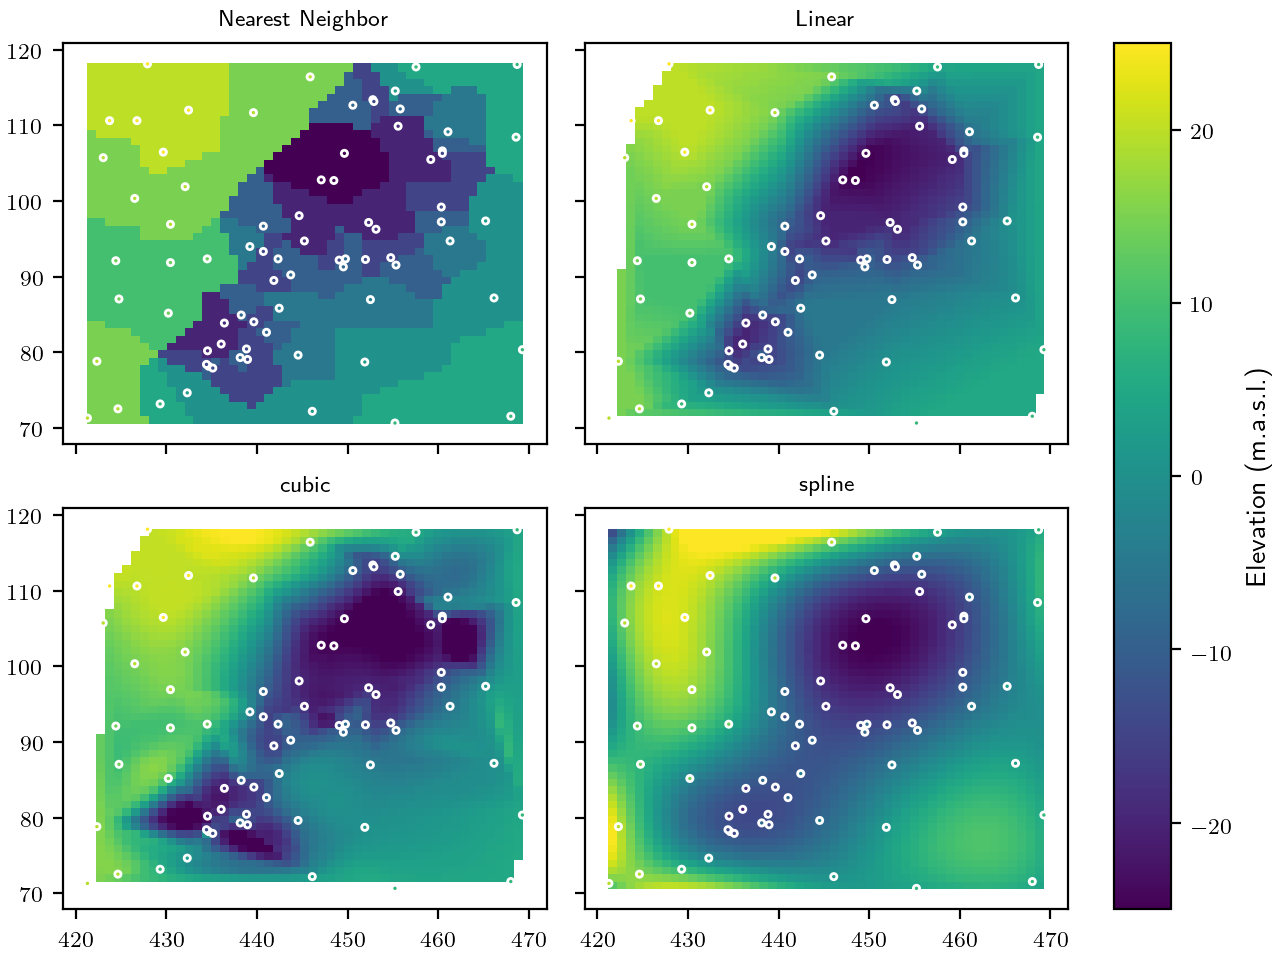

In [20]:
fig, ax = plt.subplots(2,2,sharex=True,sharey=True,constrained_layout=True)

lims = dict(cmap='viridis', vmin=-25, vmax=25)

im = ax[0,0].pcolormesh(X,Y,ZN[:,:,0],**lims)
ax[0,0].scatter(x,y,c=z,s=5,edgecolors='white')
ax[0,0].set_title('Nearest Neighbor')

im = ax[0,1].pcolormesh(X,Y,ZL[:,:,0],**lims)
ax[0,1].scatter(x,y,c=z,s=5,edgecolors='white')
ax[0,1].set_title('Linear')

im = ax[1,0].pcolormesh(X,Y,ZC[:,:,0],**lims)
ax[1,0].scatter(x,y,c=z,s=5,edgecolors='white')
ax[1,0].set_title('cubic')

im = ax[1,1].pcolormesh(X,Y,ZS,**lims)
ax[1,1].scatter(x,y,c=z,s=5,edgecolors='white')
ax[1,1].set_title('spline')

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')
#fig.tight_layout()

Lets make the same plot, now using `plt.contourf` instead of `plt.pcolormesh`

<IPython.core.display.Javascript object>


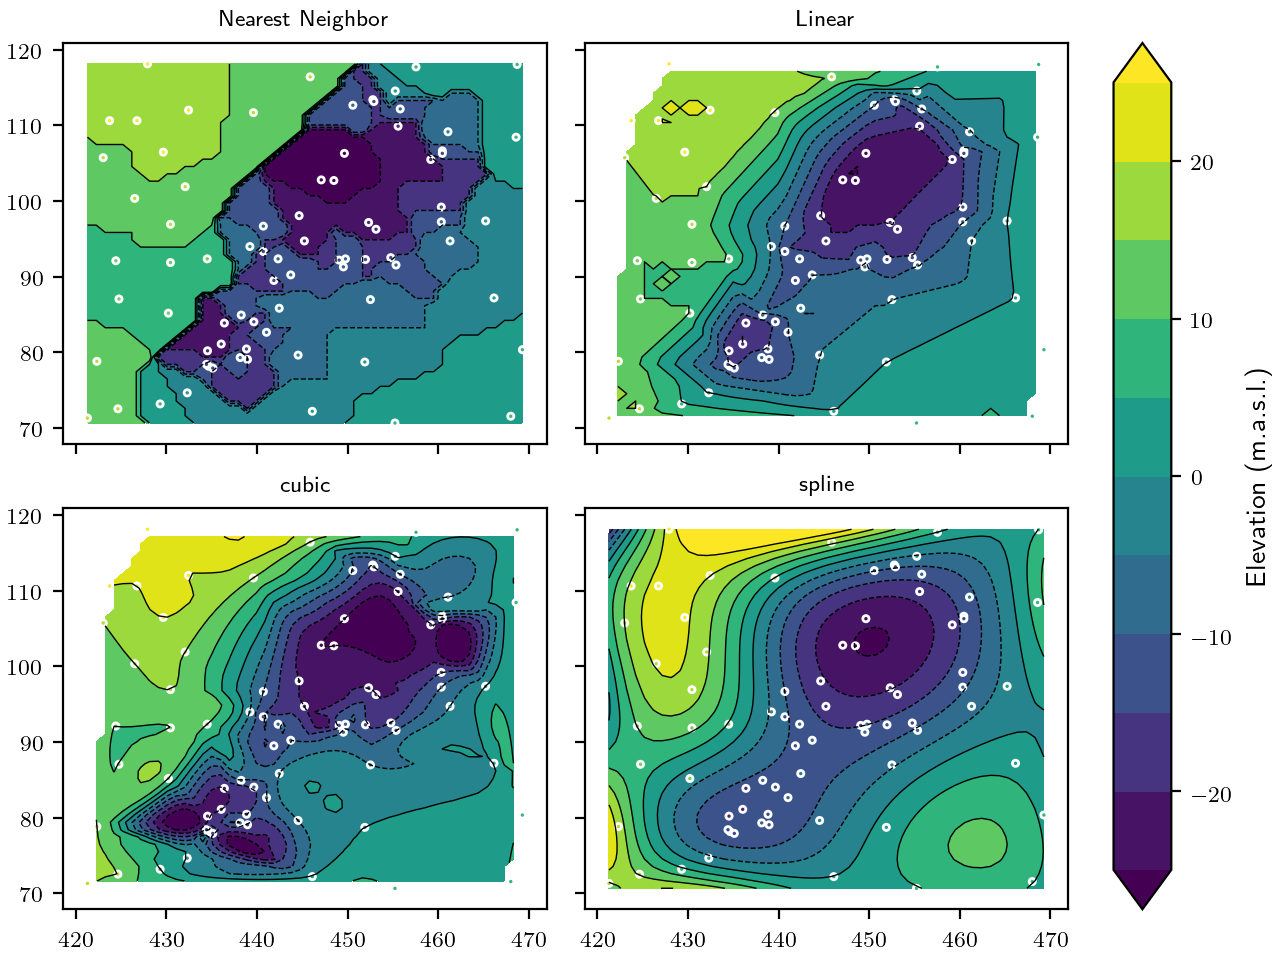

/Users/andrewnolan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


In [21]:
fig, ax = plt.subplots(2,2,sharex=True,sharey=True,constrained_layout=True)

levels = np.linspace(-25,25,11)

lims   = dict(cmap='viridis', clim=(levels[0],levels[-1]),extend='both')

im = ax[0,0].contourf(X,Y,ZN[:,:,0],levels=levels,**lims)
ax[0,0].contour(X,Y,ZN[:,:,0],levels=levels,colors='k',linewidths=0.5)
ax[0,0].scatter(x,y,c=z,s=5,edgecolors='white')
ax[0,0].set_title('Nearest Neighbor')

im = ax[0,1].contourf(X,Y,ZL[:,:,0],levels=levels,**lims)
ax[0,1].contour(X,Y,ZL[:,:,0],levels=levels,colors='k',linewidths=0.5)
ax[0,1].scatter(x,y,c=z,s=5,edgecolors='white')
ax[0,1].set_title('Linear')

im = ax[1,0].contourf(X,Y,ZC[:,:,0],levels=levels,**lims)
ax[1,0].contour(X,Y,ZC[:,:,0],levels=levels,colors='k',linewidths=0.5)
ax[1,0].scatter(x,y,c=z,s=5,edgecolors='white')
ax[1,0].set_title('cubic')

im = ax[1,1].contourf(X,Y,ZS,levels=levels,**lims)
ax[1,1].contour(X,Y,ZS,levels=levels,colors='k',linewidths=0.5)
ax[1,1].scatter(x,y,c=z,s=5,edgecolors='white')
ax[1,1].set_title('spline')

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')
#fig.tight_layout()

Lets compare results between different numbers of grid points

In [22]:
# Make the grids
xgrid20   = np.linspace(x.min(),x.max(),20)     # define regular grid in x w/ 20 points
ygrid20   = np.linspace(y.min(),y.max(),20)     # define regular grid in y w/ 20 points
xgrid50   = np.linspace(x.min(),x.max(),50)     # define regular grid in x w/ 50 points
ygrid50   = np.linspace(y.min(),y.max(),50)     # define regular grid in y w/ 50 points
xgrid100  = np.linspace(x.min(),x.max(),100)    # define regular grid in x w/ 100 points
ygrid100  = np.linspace(y.min(),y.max(),100)    # define regular grid in y w/ 100 points
xgrid200  = np.linspace(x.min(),x.max(),200)    # define regular grid in x w/ 200 points
ygrid200  = np.linspace(y.min(),y.max(),200)    # define regular grid in y w/ 200 points

# Mesh the Grids
X20, Y20  = np.meshgrid(xgrid20,ygrid20)        # Construct 2D grid of x,y (20  x 20)
X50, Y50  = np.meshgrid(xgrid50,ygrid50)        # Construct 2D grid of x,y (50  x 50)
X100,Y100 = np.meshgrid(xgrid100,ygrid100)      # Construct 2D grid of x,y (100 x 100)
X200,Y200 = np.meshgrid(xgrid200,ygrid200)      # Construct 2D grid of x,y (200 x 200)

# Interpolate onto the grids
Z20  = griddata(np.hstack((x,y)),z,(X20, Y20), method='cubic')   # 20 grid points 
Z50  = griddata(np.hstack((x,y)),z,(X50, Y50), method='cubic')   # 50 grid points   
Z100 = griddata(np.hstack((x,y)),z,(X100,Y100),method='cubic')   # 100 grid points 
Z200 = griddata(np.hstack((x,y)),z,(X200,Y200),method='cubic')   # 100 grid points 

<IPython.core.display.Javascript object>


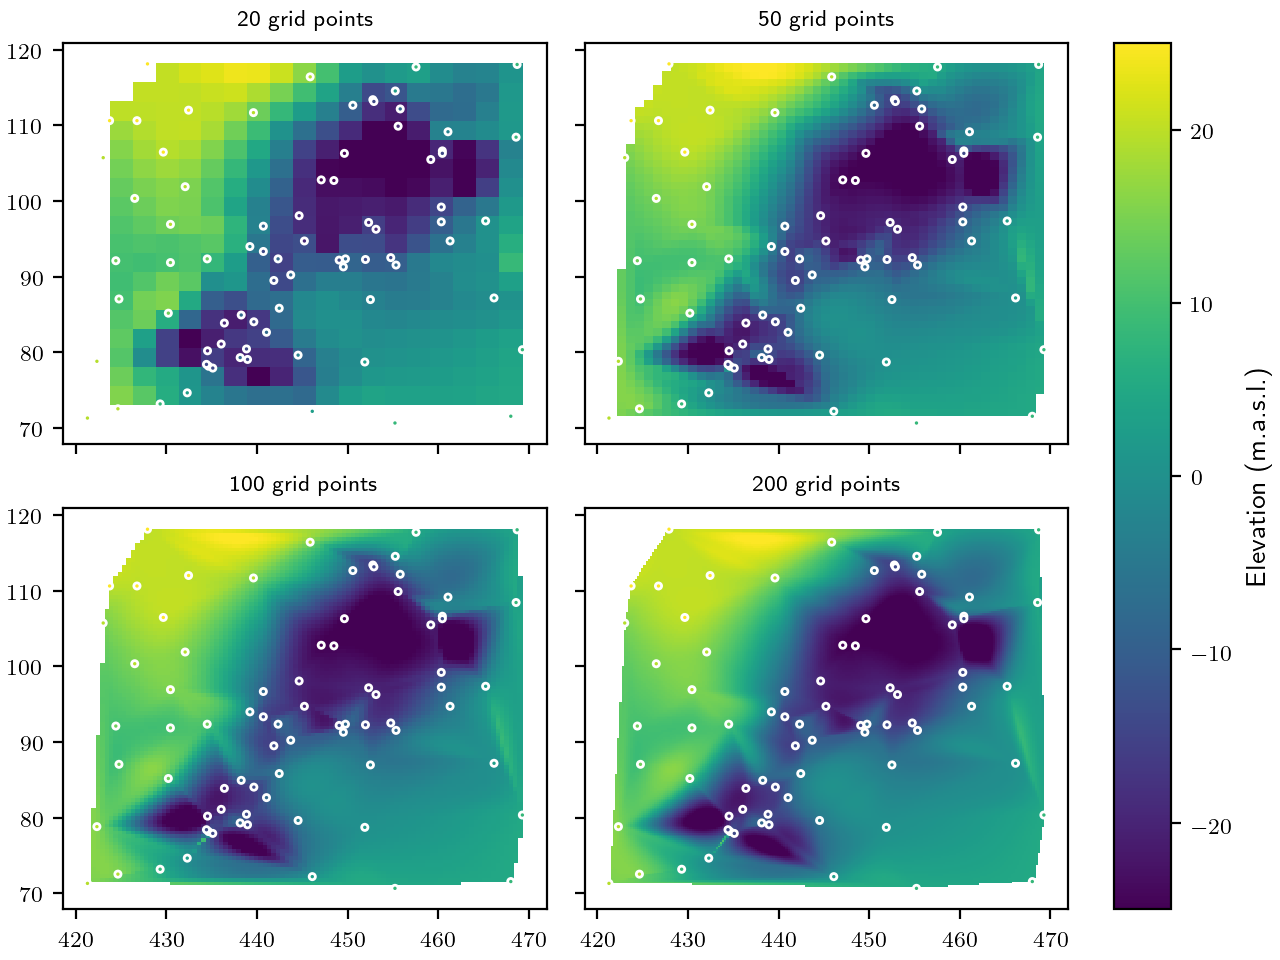

In [23]:
fig, ax = plt.subplots(2,2,sharex=True,sharey=True,constrained_layout=True)

lims = dict(cmap='viridis', vmin=-25, vmax=25)

im = ax[0,0].pcolormesh(X20,Y20,Z20[:,:,0],**lims)
ax[0,0].scatter(x,y,c=z,s=5,edgecolors='white')
ax[0,0].set_title('20 grid points')

im = ax[0,1].pcolormesh(X50,Y50,Z50[:,:,0],**lims)
ax[0,1].scatter(x,y,c=z,s=5,edgecolors='white')
ax[0,1].set_title('50 grid points')

im = ax[1,0].pcolormesh(X100,Y100,Z100[:,:,0],**lims)
ax[1,0].scatter(x,y,c=z,s=5,edgecolors='white')
ax[1,0].set_title('100 grid points')

im = ax[1,1].pcolormesh(X200,Y200,Z200[:,:,0],**lims)
ax[1,1].scatter(x,y,c=z,s=5,edgecolors='white')
ax[1,1].set_title('200 grid points')

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')
#fig.tight_layout()

## Note some other way to plot gridded data

__Filled contour:__

<IPython.core.display.Javascript object>


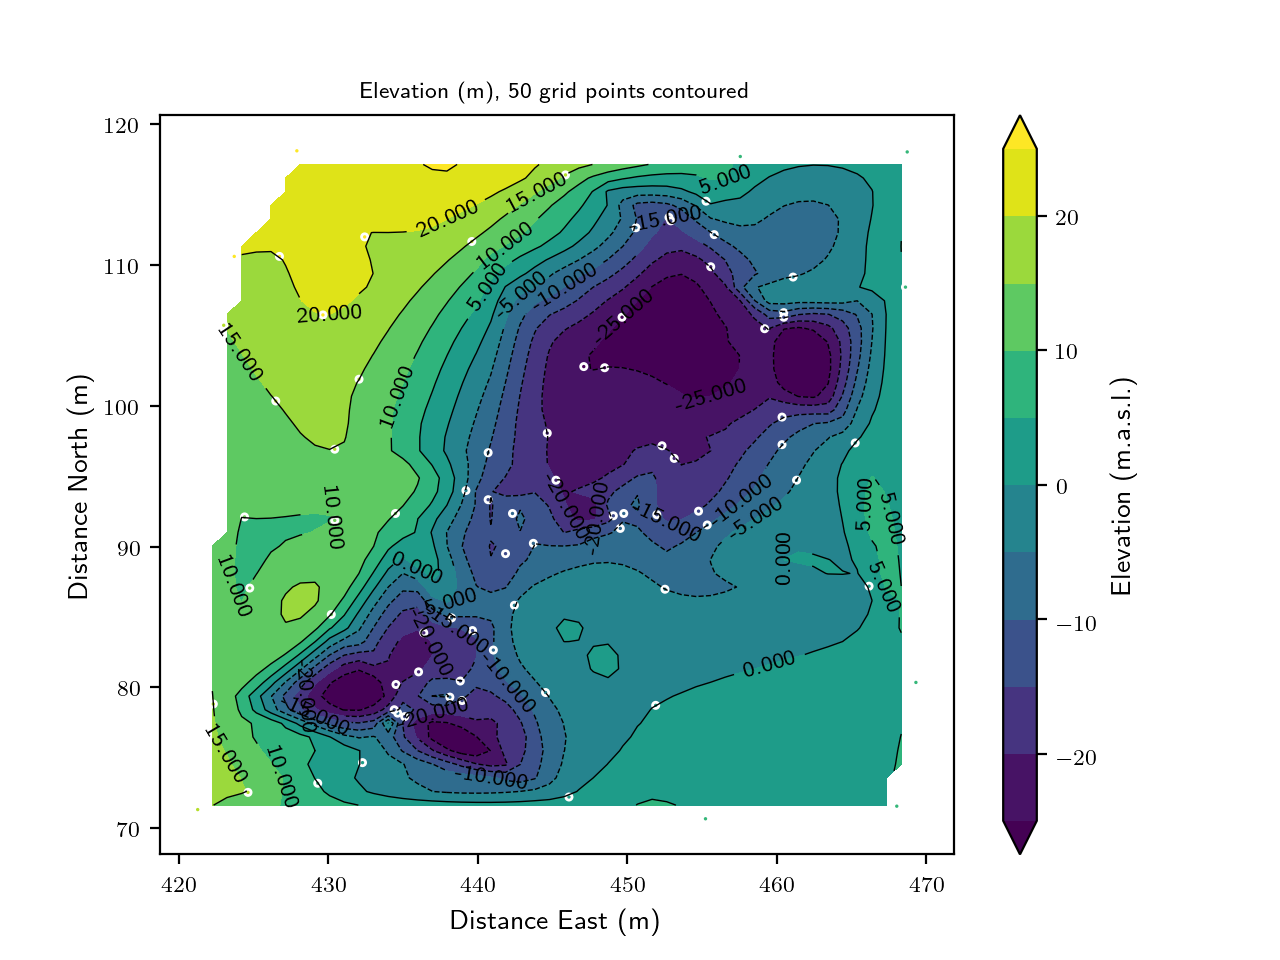

In [24]:
fig, ax = plt.subplots(1,1)

levels = np.linspace(-25,25,11)
lims   = dict(cmap='viridis', clim=(levels[0], levels[-1]),extend='both')

im = ax.contourf(X,Y,ZC[:,:,0],levels=levels,**lims)
ct = ax.contour( X,Y,ZC[:,:,0],levels=levels,colors='k',linewidths=0.5)
ax.scatter(x,y,c=z,s=5,edgecolors='white')

ax.set_title('Elevation (m), 50 grid points contoured')
ax.set_xlabel('Distance East (m)')
ax.set_ylabel('Distance North (m)')

# Add labels to contours
ax.clabel(ct, inline=1)

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')

__`pcolormesh` with edges__: 

<IPython.core.display.Javascript object>


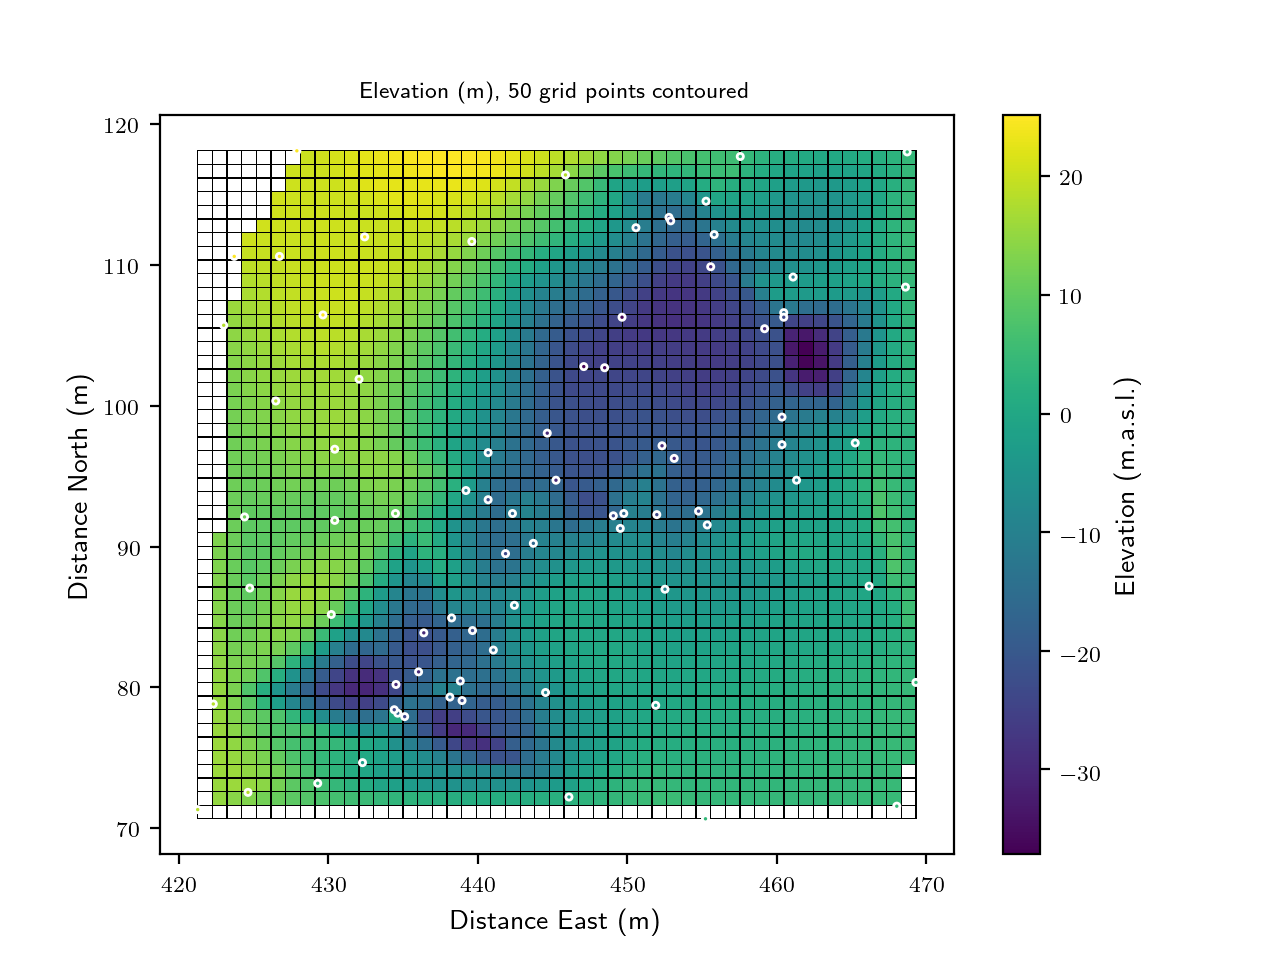

In [25]:
fig, ax = plt.subplots(1,1)

levels = np.linspace(-25,25,11)
lims   = dict(cmap='viridis', clim=(levels[0], levels[-1]))

im = ax.pcolormesh(X,Y,ZC[:,:,0],**lims,edgecolors='k',linewidth=0.1)
ax.scatter(x,y,c=z,s=5,edgecolors='white')

ax.set_title('Elevation (m), 50 grid points contoured')
ax.set_xlabel('Distance East (m)')
ax.set_ylabel('Distance North (m)')

# Add labels to contours
ax.clabel(ct, inline=1)

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')

__A 3D Surface with 2-D contours__ 

<IPython.core.display.Javascript object>


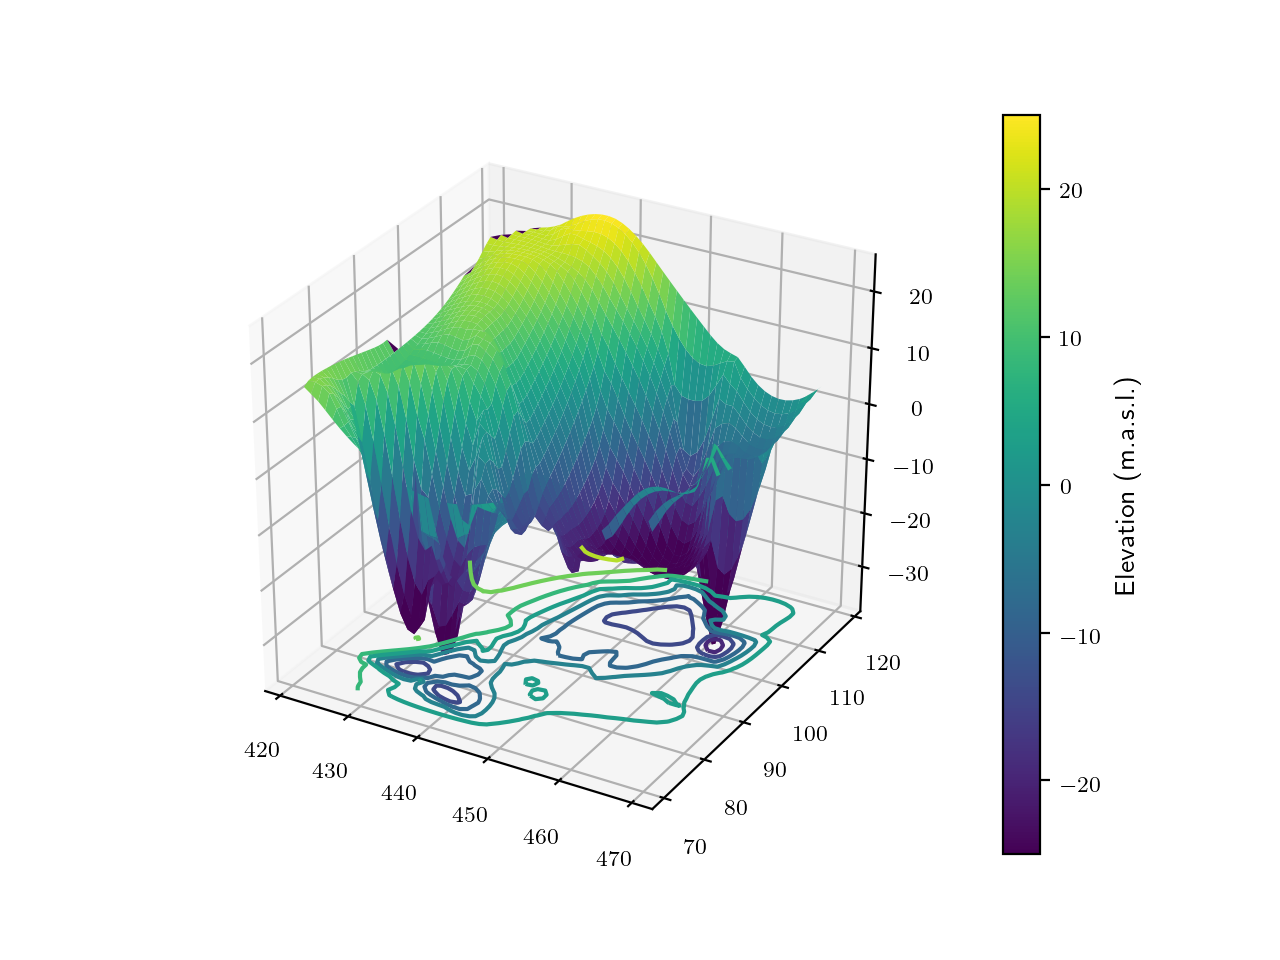

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax  = fig.add_subplot(111,projection='3d')

levels = np.linspace(-25,25,11)
lims   = dict(cmap='viridis', clim=(levels[0], levels[-1]))

im = ax.plot_surface(X,Y,ZC[:,:,0],**lims)
ct = ax.contour(X,Y,ZC[:,:,0],offset=ax.get_zlim()[0],**lims)

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')

Pretty ugly.  This is useful for exploring data, but definitely not presentation worth graphics. 

# Demo 4: Surface Trends 

In [39]:
# Davis data: subsurface structure of Pennsylvanian age formation in Kansas
ID = np.loadtxt('GRAHAM.TXT',skiprows=1)[:,0].reshape(-1,1) 
x  = np.loadtxt('GRAHAM.TXT',skiprows=1)[:,1].reshape(-1,1)
y  = np.loadtxt('GRAHAM.TXT',skiprows=1)[:,2].reshape(-1,1)
d  = np.loadtxt('GRAHAM.TXT',skiprows=1)[:,3].reshape(-1,1)

In [51]:
from scipy.interpolate import griddata

xgrid = np.linspace(x.min(),x.max(),x.shape[0])             # define regular grid in x
ygrid = np.linspace(y.min(),y.max(),y.shape[0])             # define regular grid in y
X, Y  = np.meshgrid(xgrid,ygrid)                            # Construct 2D grid of x,y
D     = griddata(np.hstack((x,y)),d,(X, Y),method='cubic')  # Cubic interpolation

<IPython.core.display.Javascript object>


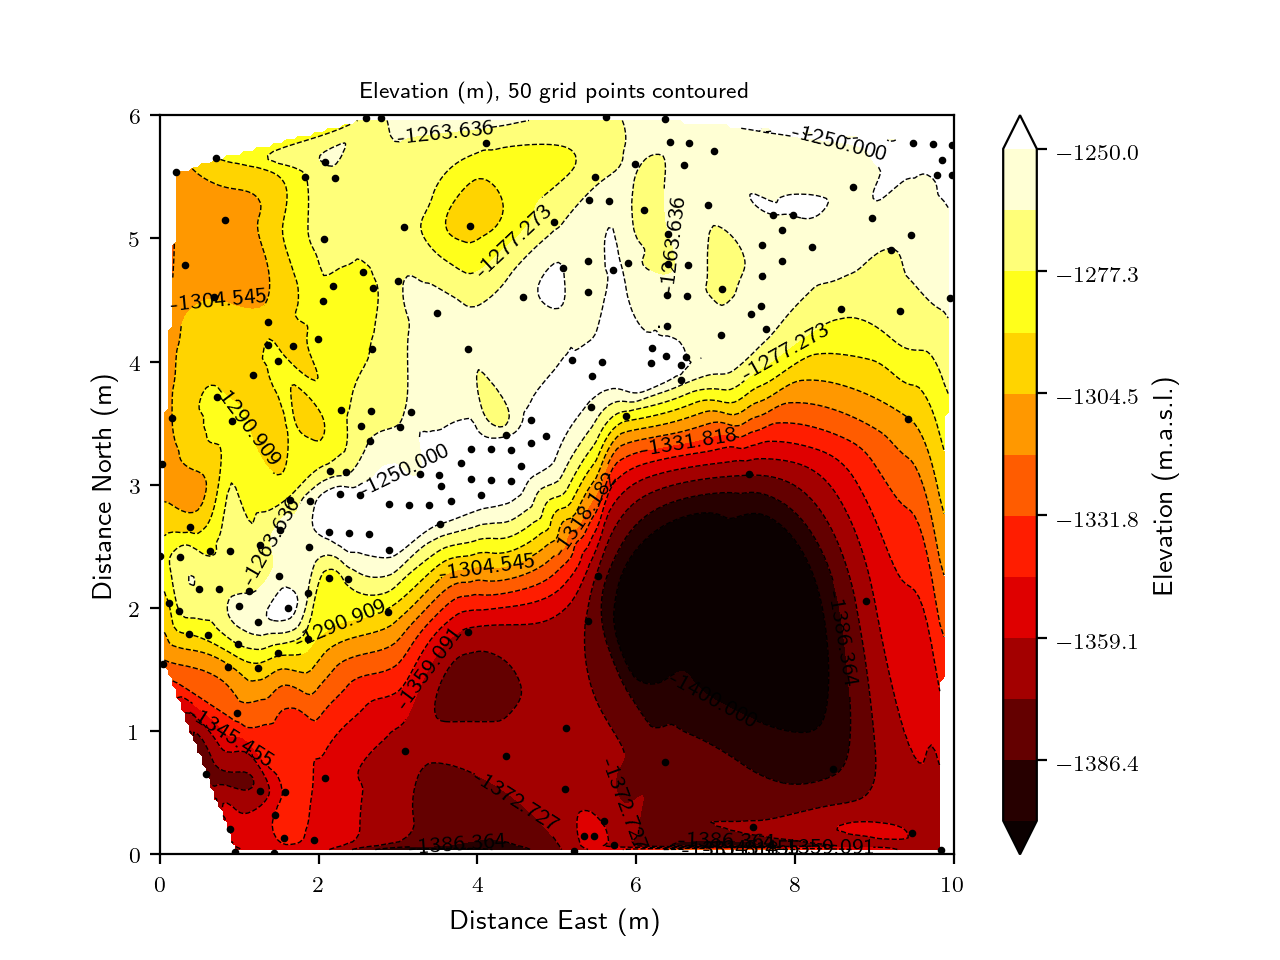

In [57]:
fig, ax = plt.subplots(1,1)

levels = np.linspace(-1400,-1250, 12)
lims   = dict(cmap='hot', vmin=levels[0], vmax=levels[-1], extend='both')

im = ax.contourf(X,Y,D[:,:,0],levels=levels,**lims)
ct = ax.contour( X,Y,D[:,:,0],levels=levels,colors='k',linewidths=0.5)
ax.scatter(x,y,c='k',s=3)

ax.set_ylim(0,6)
ax.set_xlim(0,10)

ax.set_title('Elevation (m), 50 grid points contoured')
ax.set_xlabel('Distance East (m)')
ax.set_ylabel('Distance North (m)')

# Add labels to contours
ax.clabel(ct, inline=1)

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')

## Compute best-fit linear trend

In [67]:
# Calculate components of linear system:
N     = d.shape[0]
sumx  = x.sum()
sumx2 = np.sum(x**2)
sumy  = y.sum()
sumy2 = np.sum(y**2)
sumxy = np.sum(x*y)
sumz  = d.sum()
sumxz = np.sum(x*d)
sumyz = np.sum(y*d)

In [70]:
# Assemble matrix A 
A = np.array([[N,     sumx,  sumy], 
              [sumx, sumx2, sumxy], 
              [sumy, sumxy, sumy2]])

# Assemble RHS solution vector
RHS = np.array([sumz, sumxz, sumyz]).reshape(3,1)

#  Solve A*b = RHS
b = np.linalg.solve(A,RHS)

In [71]:
# Compute surface trend with coefficients
b0 = b[0]
b1 = b[1]
b2 = b[2]
  
dlinear = b0 + b1*X + b2*Y

__Plot surface__ 

<IPython.core.display.Javascript object>


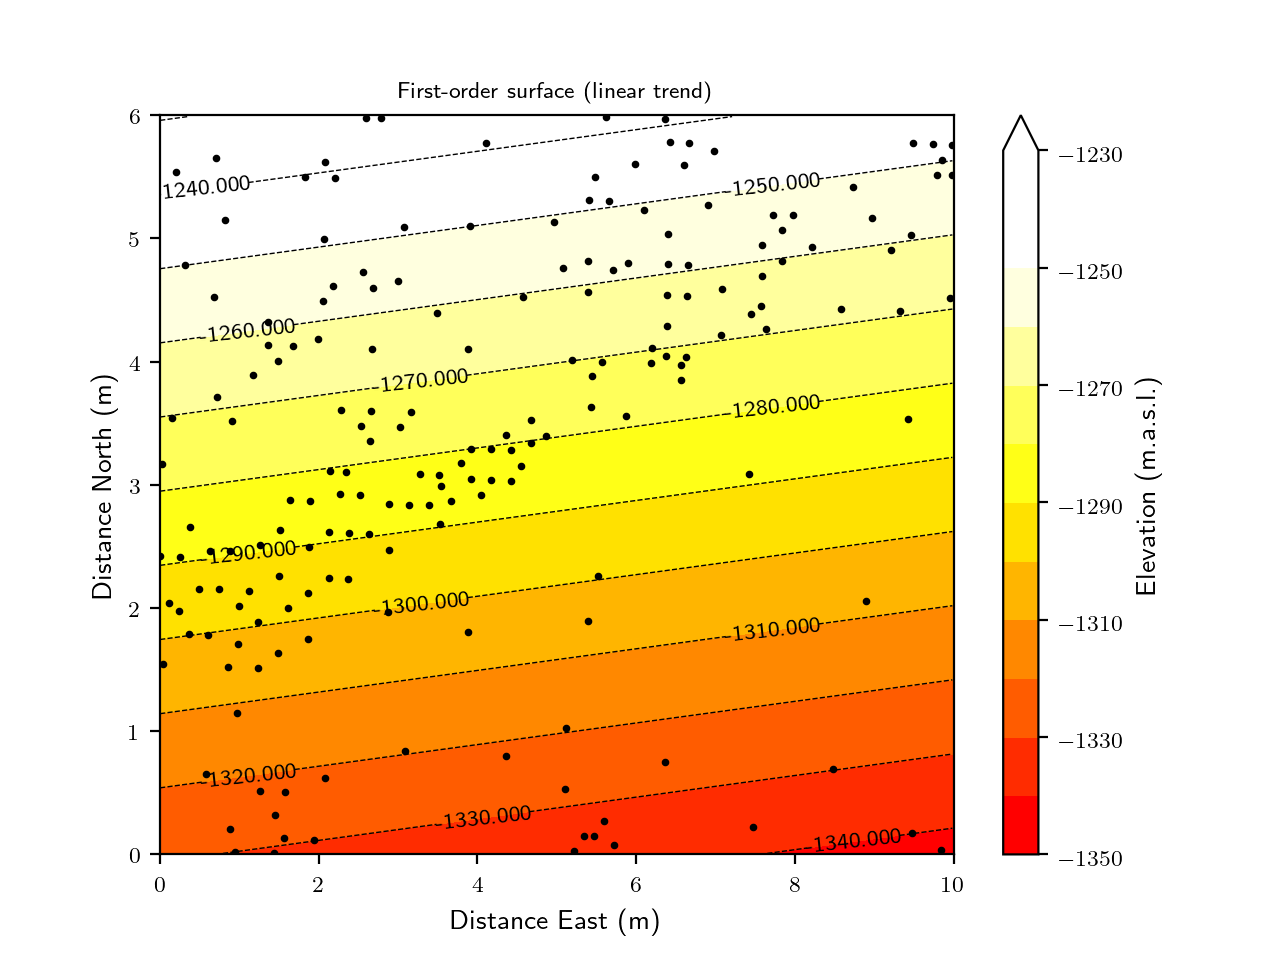

In [78]:
fig, ax = plt.subplots(1,1)

lims   = dict(cmap='hot', vmin=-1400, vmax=-1250, extend='max')

im = ax.contourf(X,Y,dlinear,levels=12,**lims)
ct = ax.contour( X,Y,dlinear,levels=12,colors='k',linewidths=0.5)
ax.scatter(x,y,c='k',s=3)

ax.set_ylim(0,6)
ax.set_xlim(0,10)

ax.set_title('First-order surface (linear trend)')
ax.set_xlabel('Distance East (m)')
ax.set_ylabel('Distance North (m)')

# Add labels to contours
ax.clabel(ct, inline=1)

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')

__Plot the residual__

<IPython.core.display.Javascript object>


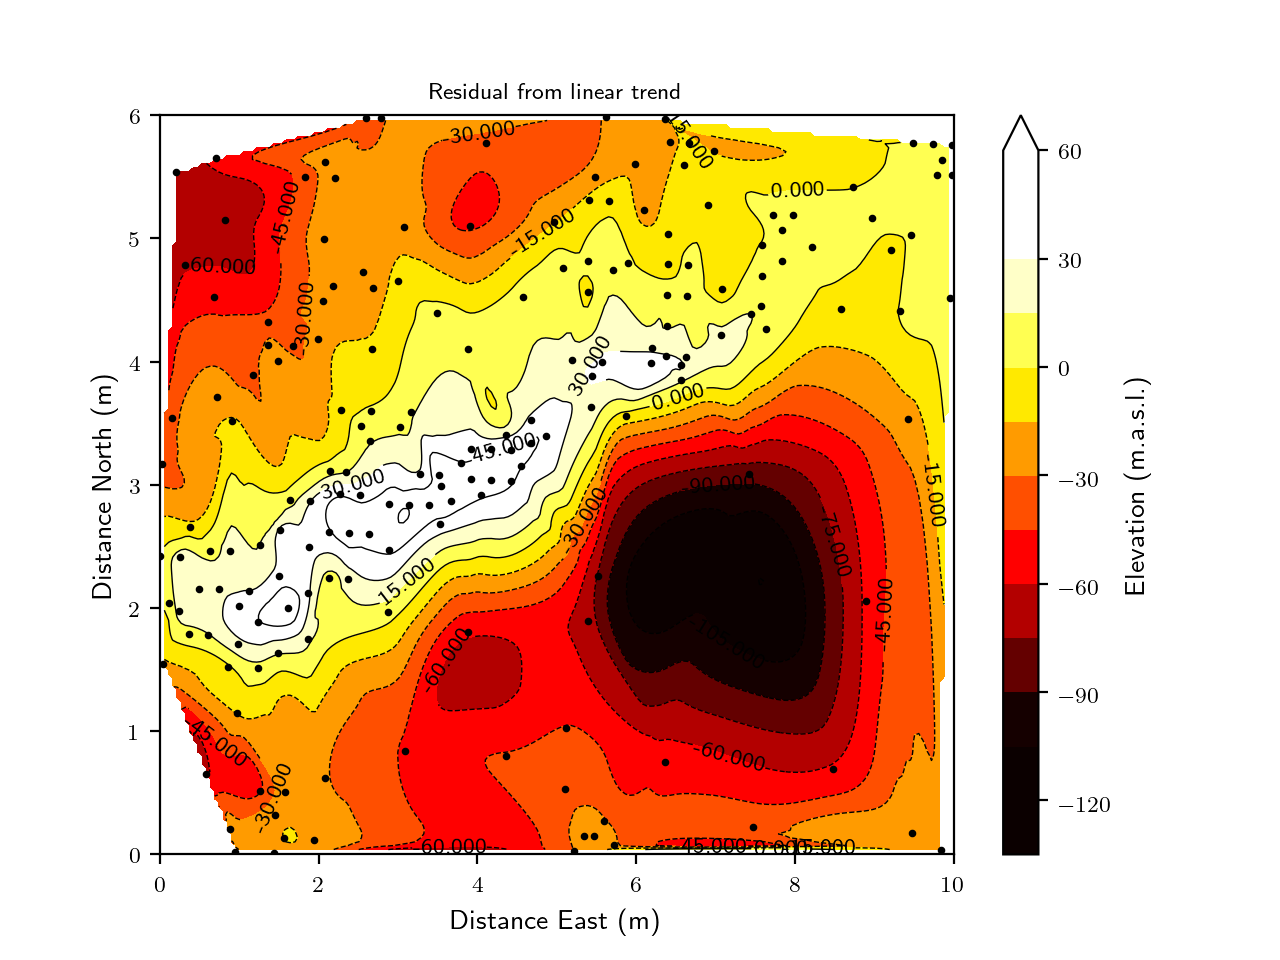

In [87]:
fig, ax = plt.subplots(1,1)

lims   = dict(cmap='hot', vmin=-100, vmax=30, extend='max')

im = ax.contourf(X,Y,D[:,:,0]-dlinear,levels=12,**lims)
ct = ax.contour( X,Y,D[:,:,0]-dlinear,levels=12,colors='k',linewidths=0.5)
ax.scatter(x,y,c='k',s=3)

ax.set_ylim(0,6)
ax.set_xlim(0,10)

ax.set_title('Residual from linear trend')
ax.set_xlabel('Distance East (m)')
ax.set_ylabel('Distance North (m)')

# Add labels to contours
ax.clabel(ct, inline=1)

cbar = fig.colorbar(im,ax=ax)
cbar.set_label('Elevation (m.a.s.l.)')

## ANOVA to assess linear fit to data

In [88]:
# Calculate predicted z at original measurement locations:  
dhat = b0 + b1*x + b2*y

In [98]:
# calculate SST, SSR, SSD, R, R^2  
sumz2    = np.sum(d**2);
sum2z    = (np.sum(d))**2;
sumzhat2 = np.sum(dhat**2)
sum2zhat = (np.sum(dhat))**2
  
SST = sumz2 - sum2z/N         # total sum of squares
print('SST: {:.3f}'.format(SST))

SSR = sumzhat2 - sum2zhat/N   # sum of squares of regression
print('SSR: {:.3f}'.format(SSR))

SSD = SST - SSR               # sum of squares of deviation
print('SSD: {:.3f}'.format(SSD))

vd  = np.var(d)               # compare to variance
print('var: {:.3f}'.format(vd))
  
R2 = SSR/SST                  # Goodness of fit
print('R^2: {:.3f}'.format(R2))

R = np.sqrt(R2)               # Correlation coefficient
print('R:   {:.3f}'.format(R))

SST: 318434.211
SSR: 130853.200
SSD: 187581.011
var: 1675.970
R^2: 0.411
R:   0.641
